# InterGalactic Magnetic Field
Here is an example for plotting various properties of the IGMF

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from cascapy.constants import *
from cascapy.interactions import Compton
from cascapy.igmf import IGMF

### Creation of a IGMF instance 

In [5]:
ig = IGMF(lb0=1*Mpc,average=False)
print(f"B = {ig.b0:.2e} G")

B = 1.00e-19 G


### Deflexion angle as a function of travelled distance
Here we plot the deflexion angle as function of the distance travelled by a lepton away from its production site (for different initial lepton energies)
    
At small distance, the Larmor radius is rather constant and the deflexion is simply proportional to the travelled distance (\propto x). However, at larger distance, the lepton starts being cooled by Compton scattering. Hence the Larmor radius decreases and the deflexion angle increases fasster withh distance (\propto x^2)

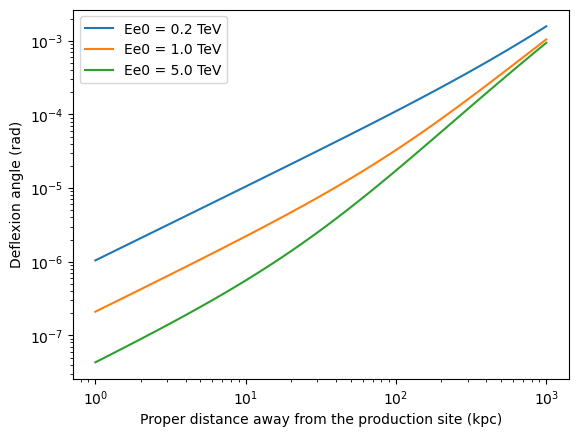

In [6]:
x = np.logspace(np.log10(1*kpc),np.log10(1*Mpc),100)
for Ee0 in [0.2*TeV,1*TeV,5*TeV]:
    d = ig.delta_x(x,Ee0,z0=0.5)
    plt.plot(x/kpc,d,label=f'Ee0 = {Ee0/TeV} TeV')

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Proper distance away from the production site (kpc)")
plt.ylabel('Deflexion angle (rad)')
plt.legend()
plt.show()

### Deflexion angle as a function of secondary energy
Here we plot the deflexion angle as a function of the observed energy of secondary photons (for different initial lepton energies and two coherence lengths 1Mpc and 1kpc).

Note that lepton of some initial energy can only produce photons below some maximal energy which produce the vertical asymptots in the plot.

Observations as smaller energies correspond to stonger lepton cooling, this is larger distance travelled away from the production site, that is larger deflexion angle.

Also, shortest coherence lengths (e.g. 1kpc in dashed lines) show smaller deflexion angle since in the diffusion regime.

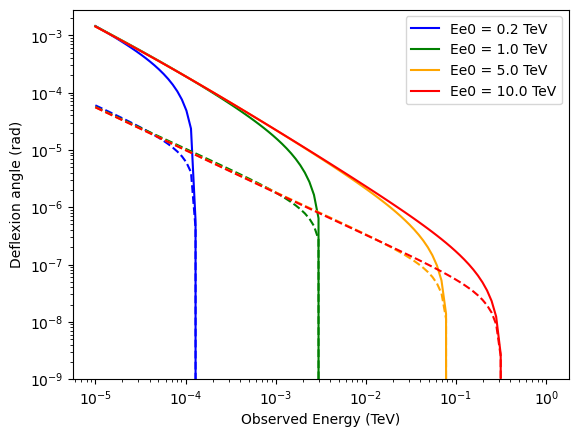

In [9]:
 Eic = np.logspace(np.log10(10*MeV),np.log10(1*TeV),100)

ls = ['-','--',':']
col = ['b','g','orange','r']
for il,lb in enumerate([1*Mpc,1*kpc]):
    ig = IGMF(lb0=lb,average=False)
    for ie,Ee0 in enumerate([200*GeV,1*TeV,5*TeV,10*TeV]):
        lab = f"Ee0 = {Ee0/TeV} TeV" if il==0 else ''
        d = ig.delta_energy_ic(Eic,Ee0,z0=0.5)
        plt.plot(Eic/TeV,d,ls=ls[il],color=col[ie],label=lab)

plt.xscale('log')
plt.yscale('log')
plt.ylim(1.e-9,)
plt.xlabel("Observed Energy (TeV)")
plt.ylabel('Deflexion angle (rad)')
plt.legend()
plt.show()

### Transition coherence length as a function of secondary emission
Here we the comoving transition coherence length lBc between the balistic regime (for lB>lBc) and the diffusion regime (for lB<lBc). This is shown assuming differnet initial lepton energies.

When observed at larger energy, secondary photons are produced closer to the production site so that a smaller coherence length is required for deflexion in the diffusion regime.

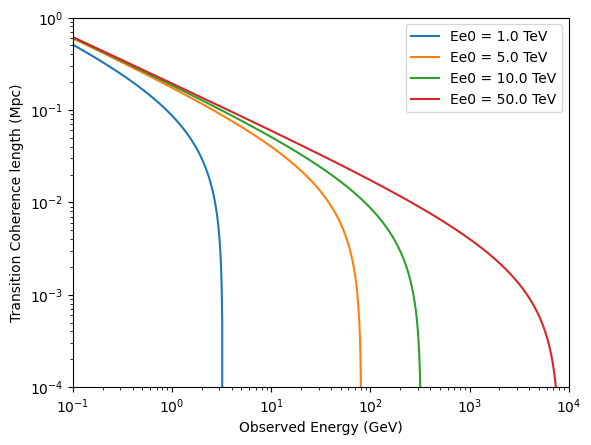

In [13]:
z0 = 0.5
Eic = np.logspace(np.log10(0.1*GeV),np.log10(10*TeV),1000)
lb = np.zeros_like(Eic)

comp = Compton()
ig = IGMF(b0=1.e-18)

for Ee0 in [1*TeV,5*TeV,10*TeV,50*TeV]:
    Lic0 = comp.Lic(Ee0,z0)
    Eic0 = comp.Eic_Ee(Ee0,z0)/(1+z0)
    lb = ig.lbc(Eic,Ee0,z0)
    plt.plot(Eic/GeV,lb/Mpc,label=f'Ee0 = {Ee0/TeV} TeV')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Observed Energy (GeV)')
plt.ylabel('Transition Coherence length (Mpc)')
plt.xlim(Eic[0]/GeV,Eic[-1]/GeV)
plt.ylim(1.e-4,1)
plt.legend()
plt.show()